In [1]:
import pandas as pd

In [2]:
df_timeseries = pd.read_csv('DATA/mergedmetadatacomments.csv', sep=',')

In [4]:
df_merged = df_timeseries


In [4]:
df_merged

,author,display_id,likes,replies,categories,channel_id,dislike_count,duration,like_count,upload_date,view_count
0,1,Gkb1QMHrGvA,2,0,People & Blogs,UCBXNpF6k2n8dsI6nBH8q4sQ,7708.0,478,85133.0,2019-06-01,11659189.0
1,1,CNtp0xqoods,0,0,Entertainment,UCpB959t8iPrxQWj7G6n0ctQ,1859.0,815,111451.0,2019-04-06,3807677.0
2,1,249EEzQmVmQ,1,0,Entertainment,UCpB959t8iPrxQWj7G6n0ctQ,1643.0,697,84571.0,2019-09-15,2679538.0
3,1,_U443T2K_Bs,0,0,Comedy,UCM2ERkgV3P1_6MAyxa51rxA,3287.0,990,41195.0,2019-08-03,1235364.0
4,1,rJbjhm0weYc,0,0,People & Blogs,UCtwD0AlYSlAYv7eXu8UxtEg,1740.0,603,18827.0,2019-09-11,914335.0
...,...,...,...,...,...,...,...,...,...,...,...
99999995,6695123,YlTNoJwRQak,3,0,Entertainment,UCqISR0F9-nCth-V2r4Qy75Q,573.0,11420,11663.0,2017-12-27,1091091.0
99999996,6695123,ESKmRiLjNpg,0,0,News & Politics,UC8Su5vZCXWRag13H53zWVwA,7293.0,91,21996.0,2018-05-08,2275956.0
99999997,6695123,DkdadDbyRZ4,1,0,Music,UCqISR0F9-nCth-V2r4Qy75Q,649.0,3971,10451.0,2019-02-11,543731.0
99999998,6695123,g6OacoeIizk,86,0,Entertainment,UC778KagX3d7gl1vzUGAmN1g,560.0,175,3516.0,2018-04-03,965892.0


In [5]:
df_mergedmin = df_merged.loc[:, ['display_id', 'author', 'replies','likes','categories']]
print(df_mergedmin.head())


    display_id  author  replies  likes      categories
0  Gkb1QMHrGvA       1        0      2  People & Blogs
1  CNtp0xqoods       1        0      0   Entertainment
2  249EEzQmVmQ       1        0      1   Entertainment
3  _U443T2K_Bs       1        0      0          Comedy
4  rJbjhm0weYc       1        0      0  People & Blogs


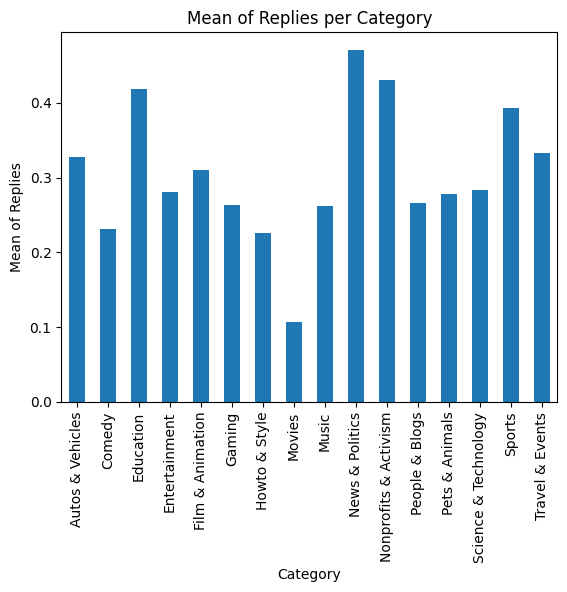

In [7]:
import matplotlib.pyplot as plt
df_replies_per_video = df_mergedmin.groupby(['categories'])['replies'].mean()
df_replies_per_video.plot(kind='bar')
plt.title('Mean of Replies per Category')
plt.xlabel('Category')
plt.ylabel('Mean of Replies')
plt.show()


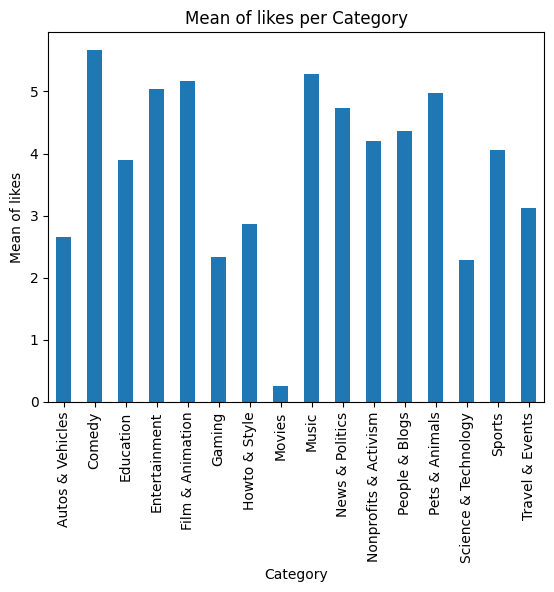

In [8]:
import matplotlib.pyplot as plt
df_replies_per_video = df_mergedmin.groupby(['categories'])['likes'].mean()
df_replies_per_video.plot(kind='bar')
plt.title('Mean of likes per Category')
plt.xlabel('Category')
plt.ylabel('Mean of likes')
plt.show()


In [6]:
df_author_categories = df_mergedmin.groupby(['author', 'categories']).size().reset_index(name='count')
df_author_categories.head()


,author,categories,count
0,1,Comedy,1
1,1,Entertainment,2
2,1,People & Blogs,2
3,2,Gaming,2
4,2,Howto & Style,1


In [7]:
df_author_categories['count_sum'] = df_author_categories.groupby('author')['count'].transform('sum')
df_author_categories['count_ratio'] = df_author_categories['count'] / df_author_categories['count_sum']
df_author_categories.head()



,author,categories,count,count_sum,count_ratio
0,1,Comedy,1,5,0.200000
1,1,Entertainment,2,5,0.400000
2,1,People & Blogs,2,5,0.400000
3,2,Gaming,2,3,0.666667
4,2,Howto & Style,1,3,0.333333


In [23]:
df_author_categories

,author,categories,count,count_ratio
0,1,Comedy,1,0.200000
1,1,Entertainment,2,0.400000
2,1,People & Blogs,2,0.400000
3,2,Gaming,2,0.666667
4,2,Howto & Style,1,0.333333
...,...,...,...,...
13048887,6695123,People & Blogs,347,0.031414
13048888,6695123,Pets & Animals,1,0.000091
13048889,6695123,Science & Technology,7,0.000634
13048890,6695123,Sports,515,0.046623


In [8]:
df_author_categories.drop('count_sum', axis=1, inplace=True)
df_author_categories.head()



,author,categories,count,count_ratio
0,1,Comedy,1,0.200000
1,1,Entertainment,2,0.400000
2,1,People & Blogs,2,0.400000
3,2,Gaming,2,0.666667
4,2,Howto & Style,1,0.333333


In [24]:
categories_to_keep = ['Gaming', 'Music', 'News & Politics', 'Science & Technology', 'Sports','Howto & Style']
df_author_categories_filtered = df_author_categories[df_author_categories['categories'].isin(categories_to_keep)]
df_author_categories_filtered.head()

,author,categories,count,count_ratio
3,2,Gaming,2,0.666667
4,2,Howto & Style,1,0.333333
8,4,News & Politics,1,0.166667
9,4,Science & Technology,1,0.166667
10,5,Gaming,2,0.666667


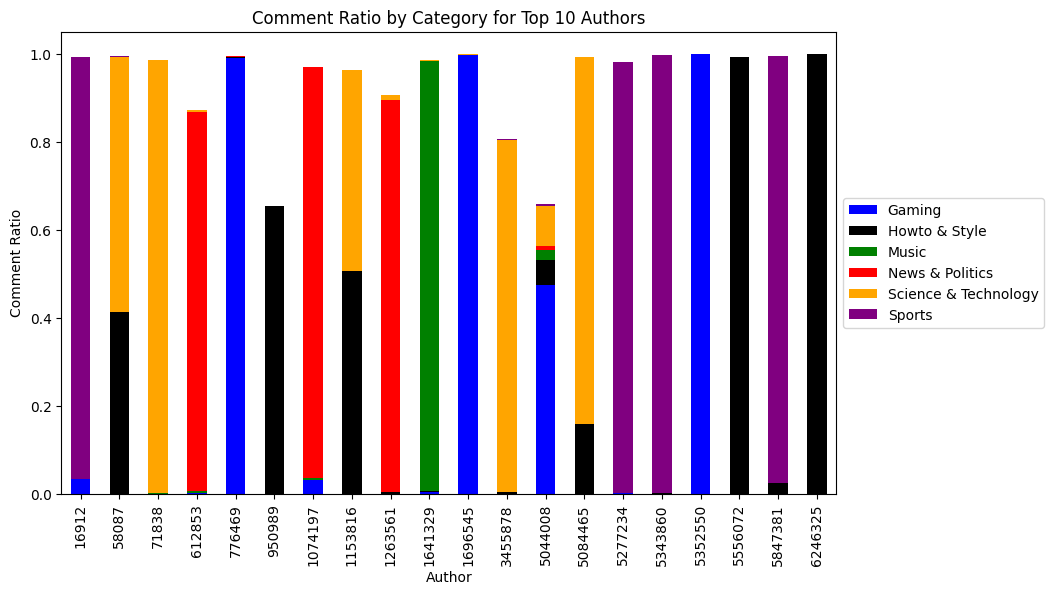

In [26]:
import matplotlib.pyplot as plt

# Define colors for each category
colors = {'Gaming': 'blue', 'Music': 'green', 'News & Politics': 'red', 'Science & Technology': 'orange', 'Sports': 'purple','Howto & Style':'black'}
# pick top 10 authors by comment count
top_authors = df_author_categories_filtered.groupby('author')['count'].sum().sort_values(ascending=False).head(20).index.tolist()

# filter the dataframe to only include the top 10 authors
df_top_authors = df_author_categories_filtered[df_author_categories_filtered['author'].isin(top_authors)]

# create a pivot table to prepare data for stacked plot
df_pivot = df_top_authors.pivot(index='author', columns='categories', values='count_ratio')

# plot the stacked plot
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True, ax=ax, color=[colors[c] for c in df_pivot.columns])

plt.title('Comment Ratio by Category for Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Comment Ratio')

# move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


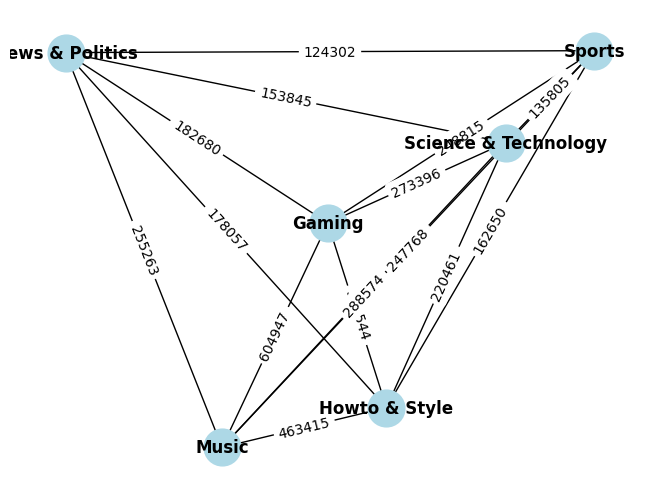

In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


df = df_author_categories_filtered

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df.iterrows():
    G.add_node(row['categories'])
    G.nodes[row['categories']]['count'] = row['count']
    G.nodes[row['categories']]['count_ratio'] = row['count_ratio']

# Add edges based on common authors
for _, group in df.groupby('author'):
    categories = group['categories'].tolist()
    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            if G.has_edge(categories[i], categories[j]):
                G[categories[i]][categories[j]]['weight'] += 1
            else:
                G.add_edge(categories[i], categories[j], weight=1)

# Draw the graph
pos = nx.spring_layout(G)  # You can choose a different layout if needed
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.show()


In [8]:
import matplotlib.pyplot as plt
df = df_author_categories

# Aggregate the counts for each category
category_counts = df.groupby('categories')['count'].sum().reset_index()
category_counts.head()


,categories,count
0,Autos & Vehicles,1439195
1,Comedy,5935601
2,Education,3194513
3,Entertainment,21091479
4,Film & Animation,3691346


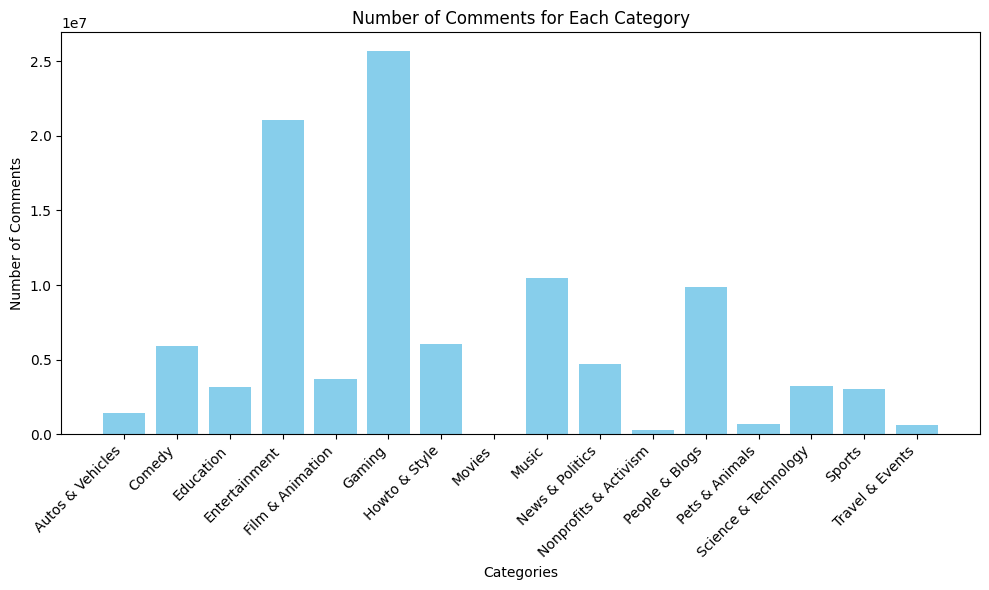

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(category_counts['categories'], category_counts['count'], color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Comments')
plt.title('Number of Comments for Each Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()